Found 160 files


/var/folders/ch/b9nk2s4s0wd77l2b780z9wdh0000gn/T/ipykernel_50589/1240518404.py:50: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "v-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(distance_stab, sim_times_stab, "v-", label="STAB-Sim (This Work)", linestyle="-", color="red", markersize=5)
/var/folders/ch/b9nk2s4s0wd77l2b780z9wdh0000gn/T/ipykernel_50589/1240518404.py:52: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ">-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(distance_stim, sim_times_stim, ">-", label="Stim", linestyle="--", color="green", markersize=5)
/var/folders/ch/b9nk2s4s0wd77l2b780z9wdh0000gn/T/ipykernel_50589/1240518404.py:53: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "<-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(distan

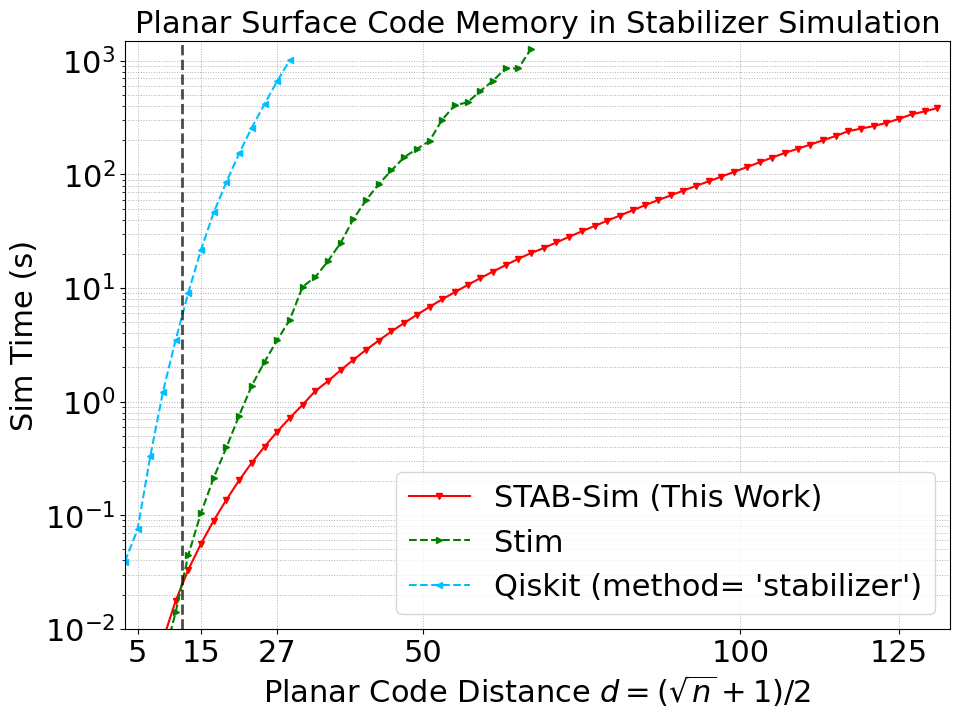

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

def read_and_label_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    labels = ["sim_name", "sim_time", "distance", "rounds", "n_qubits"]
    data = {labels[i]: lines[i].strip() if i == 0 else float(lines[i]) for i in range(len(lines))}
    
    return data

def process_folder(folder_path):
    all_data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"): 
            filepath = os.path.join(folder_path, filename)
            data = read_and_label_file(filepath)
            all_data.append(data)
    
    return sorted(all_data, key=lambda x: x["distance"])  # Sort by sim_time

def plot_data(all_data):
    sim_times_stab = []
    sim_times_stim = []
    distance_stab = []
    distance_stim = []
    sim_times_cpu = []
    distance_cpu = []
    sim_times_qiskit= []
    distance_qiskit = []

    for data in all_data:
        if data["sim_name"] == "nvgpu" and data["sim_time"] < 1300:
            distance_stab.append(float(data["distance"]))
            sim_times_stab.append(float(data["sim_time"]))
        elif data["sim_name"] == "stim" and data["sim_time"] < 1300:
            distance_stim.append(float(data["distance"]))
            sim_times_stim.append(float(data["sim_time"]))
        # elif data["sim_name"] == "cpu" and data["sim_time"] < 1300:
        #     distance_cpu.append(float(data["distance"]))
        #     sim_times_cpu.append(float(data["sim_time"]))
        elif data["sim_name"] == "qiskit" and data["sim_time"] < 1300:
            distance_qiskit.append(float(data["distance"]))
            sim_times_qiskit.append(float(data["sim_time"]))

    plt.figure(figsize=(10, 7))
    plt.plot(distance_stab, sim_times_stab, "v-", label="STAB-Sim (This Work)", linestyle="-", color="red", markersize=5)
    # plt.plot(distance_cpu, sim_times_cpu, "^-", label="STAB-CPU", linestyle="-", color="orange", markersize=5)
    plt.plot(distance_stim, sim_times_stim, ">-", label="Stim", linestyle="--", color="green", markersize=5)
    plt.plot(distance_qiskit, sim_times_qiskit, "<-", label="Qiskit (method= 'stabilizer')", linestyle="--", color="deepskyblue", markersize=5)

    # Find where STAB-GPU overtakes Stim
    crossover_distance = None
    if len(distance_stab) > 5 and len(distance_stim) > 5:
        # Find the crossover point by comparing interpolated values
        min_dist = max(min(distance_stab), min(distance_stim))
        max_dist = min(max(distance_stab), max(distance_stim))
        
        # Check distances in the overlapping range
        for d in range(int(min_dist), int(max_dist) + 1):
            # Find closest points for interpolation
            stab_times_at_d = []
            stim_times_at_d = []
            
            for i, dist in enumerate(distance_stab):
                if abs(dist - d) < 2:  # Within 2 units
                    stab_times_at_d.append(sim_times_stab[i])
            
            for i, dist in enumerate(distance_stim):
                if abs(dist - d) < 2:  # Within 2 units
                    stim_times_at_d.append(sim_times_stim[i])
            
            if stab_times_at_d and stim_times_at_d:
                avg_stab = np.mean(stab_times_at_d)
                avg_stim = np.mean(stim_times_at_d)
                
                if avg_stab < avg_stim and crossover_distance is None:
                    crossover_distance = d
                    break
    
    # Add vertical line at crossover point
    if crossover_distance:
        plt.axvline(x=crossover_distance, color='black', linestyle='--', alpha=0.7, linewidth=2)

    # Increase font size for axis labels and title
    plt.xlabel(r"Planar Code Distance $d=(\sqrt{n}+1)/2$", fontsize=22)
    plt.ylabel("Sim Time (s)", fontsize=22)
    plt.title("Planar Surface Code Memory in Stabilizer Simulation", fontsize=22)
    
    # Increase font size for ticks
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    # Set the x-axis to log2 scale
    plt.ylim(.01, 1500)
    plt.xlim(3, 133)
    plt.yscale("log", base=10)
    # plt.xscale("log", base=10)

    
    # Only show the x-axis ticks for 5, 15, 51, and 99 on the log2 scale
    plt.xticks([5, 15, 27, 50, 100, 125], labels=[str(x) for x in [5, 15, 27, 50, 100, 125]])

    # Increase font size for the legend
    plt.legend(fontsize=22)

    plt.grid(True, linestyle=":", linewidth=0.7, which="both")

    # Adjust layout to cut off some whitespace
    plt.subplots_adjust(top=0.95, right=0.95)

    # Save the plot as a PDF
    plt.savefig("graphics/fowler_improved.pdf", format="pdf")

    plt.show()

folder_path = "fowler_improved"  
all_data = process_folder(folder_path)

print(f"Found {len(all_data)} files")

if not all_data:
    print("No data found.")

plot_data(all_data)


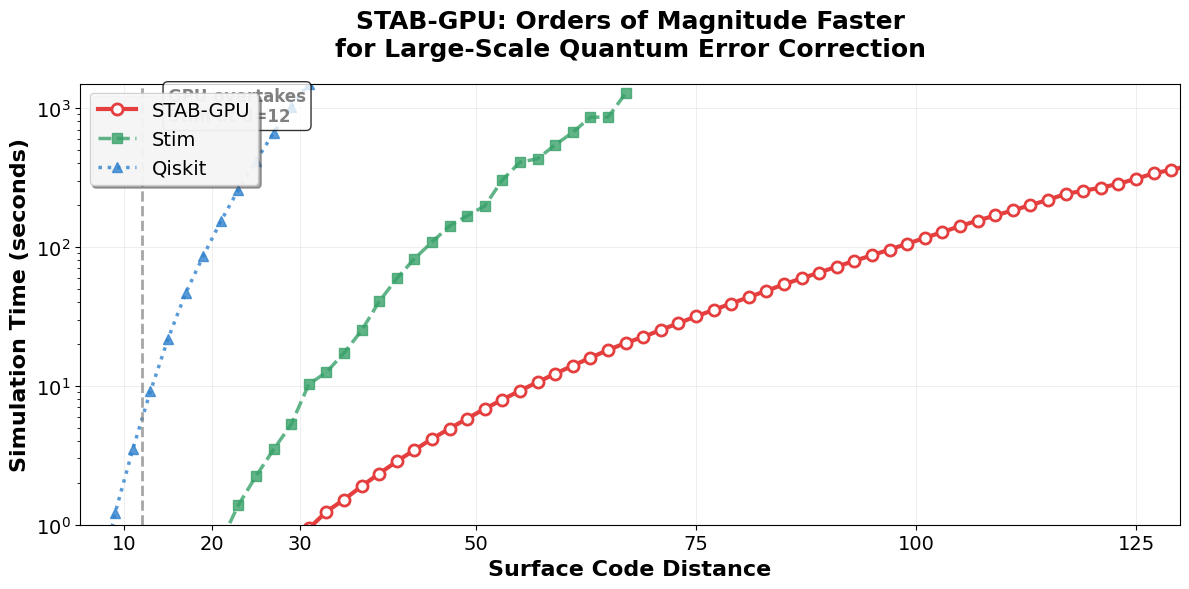

In [2]:
# Create a simplified "tag-line" figure highlighting STAB-GPU performance
def create_tagline_figure(all_data):
    # Extract data for simplified comparison (excluding STAB-CPU)
    sim_times_stab = []
    sim_times_stim = []
    sim_times_qiskit = []
    distance_stab = []
    distance_stim = []
    distance_qiskit = []

    for data in all_data:
        if data["sim_name"] == "nvgpu" and data["sim_time"] < 1300:
            distance_stab.append(float(data["distance"]))
            sim_times_stab.append(float(data["sim_time"]))
        elif data["sim_name"] == "stim" and data["sim_time"] < 1300:
            distance_stim.append(float(data["distance"]))
            sim_times_stim.append(float(data["sim_time"]))
        elif data["sim_name"] == "qiskit" and data["sim_time"] < 1500:
            distance_qiskit.append(float(data["distance"]))
            sim_times_qiskit.append(float(data["sim_time"]))

    # Create a compact, impactful figure
    plt.figure(figsize=(12, 6))
    
    # Plot with cleaner styling
    plt.plot(distance_stab, sim_times_stab, "o-", label="STAB-GPU", 
             linewidth=3, color="#E53E3E", markersize=8, markerfacecolor='white', 
             markeredgecolor="#E53E3E", markeredgewidth=2)
    plt.plot(distance_stim, sim_times_stim, "s--", label="Stim", 
             linewidth=2.5, color="#38A169", markersize=7, alpha=0.8)
    plt.plot(distance_qiskit, sim_times_qiskit, "^:", label="Qiskit", 
             linewidth=2.5, color="#3182CE", markersize=7, alpha=0.8)

    # Clean, professional styling
    plt.xlabel("Surface Code Distance", fontsize=16, fontweight='bold')
    plt.ylabel("Simulation Time (seconds)", fontsize=16, fontweight='bold')
    plt.title("STAB-GPU: Orders of Magnitude Faster\nfor Large-Scale Quantum Error Correction", 
              fontsize=18, fontweight='bold', pad=20)
    
    # Set limits to show the performance gap clearly
    plt.ylim(1, 1500)
    plt.xlim(5, 130)
    plt.yscale("log")
    
    # Cleaner tick formatting
    plt.xticks([10, 20, 30, 50, 75, 100, 125], fontsize=14)
    plt.yticks([1, 10, 100, 1000], fontsize=14)
    
    # Find where STAB-GPU overtakes Stim
    crossover_distance = None
    if len(distance_stab) > 5 and len(distance_stim) > 5:
        # Find the crossover point by comparing interpolated values
        min_dist = max(min(distance_stab), min(distance_stim))
        max_dist = min(max(distance_stab), max(distance_stim))
        
        # Check distances in the overlapping range
        for d in range(int(min_dist), int(max_dist) + 1):
            # Find closest points for interpolation
            stab_times_at_d = []
            stim_times_at_d = []
            
            for i, dist in enumerate(distance_stab):
                if abs(dist - d) < 2:  # Within 2 units
                    stab_times_at_d.append(sim_times_stab[i])
            
            for i, dist in enumerate(distance_stim):
                if abs(dist - d) < 2:  # Within 2 units
                    stim_times_at_d.append(sim_times_stim[i])
            
            if stab_times_at_d and stim_times_at_d:
                avg_stab = np.mean(stab_times_at_d)
                avg_stim = np.mean(stim_times_at_d)
                
                if avg_stab < avg_stim and crossover_distance is None:
                    crossover_distance = d
                    break
    
    # Add vertical line at crossover point
    if crossover_distance:
        plt.axvline(x=crossover_distance, color='gray', linestyle='--', alpha=0.7, linewidth=2)
        plt.text(crossover_distance + 3, 800, f'GPU overtakes\nStim at d={crossover_distance}', 
                fontsize=12, fontweight='bold', color='gray',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    # Add performance annotations at key points
    if len(distance_stab) > 10 and len(distance_qiskit) > 5:
        # Find a good comparison point
        target_distance = 50
        stab_idx = min(range(len(distance_stab)), key=lambda i: abs(distance_stab[i] - target_distance))
        qiskit_idx = min(range(len(distance_qiskit)), key=lambda i: abs(distance_qiskit[i] - target_distance))
        
        if distance_stab[stab_idx] > 40 and distance_qiskit[qiskit_idx] > 40:
            speedup = sim_times_qiskit[qiskit_idx] / sim_times_stab[stab_idx]
            plt.annotate(f'{speedup:.0f}× faster', 
                        xy=(distance_stab[stab_idx], sim_times_stab[stab_idx]), 
                        xytext=(distance_stab[stab_idx] + 15, sim_times_stab[stab_idx] * 3),
                        fontsize=14, fontweight='bold', color='#E53E3E',
                        arrowprops=dict(arrowstyle='->', color='#E53E3E', lw=2))

    # Professional legend
    plt.legend(fontsize=14, frameon=True, fancybox=True, shadow=True, 
               loc='upper left', framealpha=0.9)
    
    # Subtle grid
    plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    
    # Tight layout
    plt.tight_layout()
    
    # Save as high-quality figure
    plt.savefig("graphics/stab_gpu_tagline.pdf", format="pdf", dpi=300, bbox_inches='tight')
    plt.savefig("graphics/stab_gpu_tagline.png", format="png", dpi=300, bbox_inches='tight')
    
    plt.show()

# Generate the tag-line figure
create_tagline_figure(all_data)

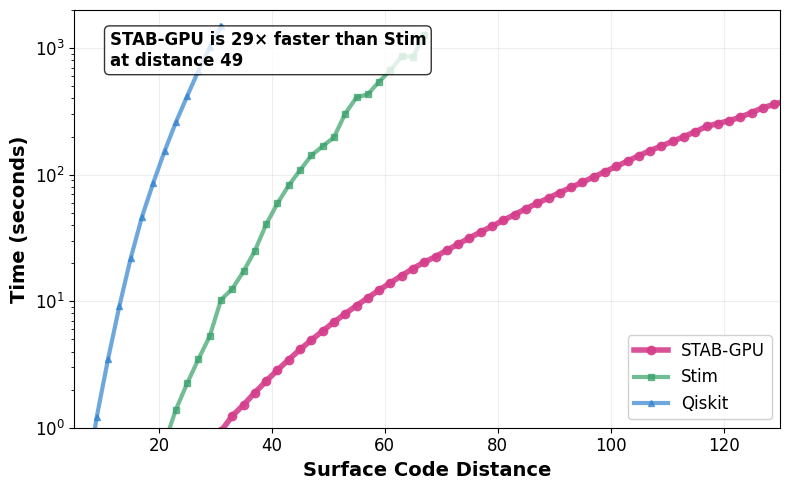

In [3]:
# Create an ultra-compact "tag-line" figure - perfect for slides or papers
def create_compact_tagline(all_data):
    # Extract data
    sim_times_stab = []
    sim_times_stim = []
    sim_times_qiskit = []
    distance_stab = []
    distance_stim = []
    distance_qiskit = []

    for data in all_data:
        if data["sim_name"] == "nvgpu" and data["sim_time"] < 1300:
            distance_stab.append(float(data["distance"]))
            sim_times_stab.append(float(data["sim_time"]))
        elif data["sim_name"] == "stim" and data["sim_time"] < 1300:
            distance_stim.append(float(data["distance"]))
            sim_times_stim.append(float(data["sim_time"]))
        elif data["sim_name"] == "qiskit" and data["sim_time"] < 1500:
            distance_qiskit.append(float(data["distance"]))
            sim_times_qiskit.append(float(data["sim_time"]))

    # Create a very compact figure
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Bold, high-contrast styling
    ax.plot(distance_stab, sim_times_stab, "o-", label="STAB-GPU", 
            linewidth=4, color="#D53F8C", markersize=6, alpha=0.9)
    ax.plot(distance_stim, sim_times_stim, "s-", label="Stim", 
            linewidth=3, color="#38A169", markersize=5, alpha=0.7)
    ax.plot(distance_qiskit, sim_times_qiskit, "^-", label="Qiskit", 
            linewidth=3, color="#3182CE", markersize=5, alpha=0.7)

    # Minimal, impactful labeling
    ax.set_xlabel("Surface Code Distance", fontsize=14, fontweight='bold')
    ax.set_ylabel("Time (seconds)", fontsize=14, fontweight='bold')
    
    # Calculate and display key speedup metrics
    # Find speedup at distance ~50
    target_distance = 50
    stab_idx = min(range(len(distance_stab)), key=lambda i: abs(distance_stab[i] - target_distance))
    stim_idx = min(range(len(distance_stim)), key=lambda i: abs(distance_stim[i] - target_distance))
    
    if distance_stab[stab_idx] > 40 and distance_stim[stim_idx] > 40:
        speedup_stim = sim_times_stim[stim_idx] / sim_times_stab[stab_idx]
        ax.text(0.05, 0.95, f"STAB-GPU is {speedup_stim:.0f}× faster than Stim\nat distance {distance_stab[stab_idx]:.0f}", 
                transform=ax.transAxes, fontsize=12, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8),
                verticalalignment='top')
    
    ax.set_yscale("log")
    ax.set_ylim(1, 2000)
    ax.set_xlim(5, 130)
    
    # Clean ticks
    ax.tick_params(labelsize=12)
    
    # Minimal legend
    ax.legend(fontsize=12, loc='lower right', framealpha=0.9)
    
    # Light grid
    ax.grid(True, alpha=0.2)
    
    plt.tight_layout()
    
    # Save both formats
    plt.savefig("graphics/stab_gpu_compact_tagline.pdf", format="pdf", dpi=300, bbox_inches='tight')
    plt.savefig("graphics/stab_gpu_compact_tagline.png", format="png", dpi=300, bbox_inches='tight')
    
    plt.show()

# Generate the compact tag-line figure
create_compact_tagline(all_data)